In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
file = '//home//vinicius//Data_Science//Notebooks//Data_Files//911.csv'
df = pd.read_csv(file)

In [12]:
## Check DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
## Check Types
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [34]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**timeStamp looks object, need convert to date time**

In [14]:
##Top 5 ceps
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [15]:
## Top 5 citys
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [31]:
## Which title calls exists?
df['title'].nunique() ##110 unique title 
n_unique= pd.Series(df['title'].unique())
n_unique.head(10) ##Pandas Series with type of call

0         EMS: BACK PAINS/INJURY
1        EMS: DIABETIC EMERGENCY
2            Fire: GAS-ODOR/LEAK
3         EMS: CARDIAC EMERGENCY
4                 EMS: DIZZINESS
5               EMS: HEAD INJURY
6           EMS: NAUSEA/VOMITING
7     EMS: RESPIRATORY EMERGENCY
8          EMS: SYNCOPAL EPISODE
9    Traffic: VEHICLE ACCIDENT -
dtype: object

In [38]:
## Create Reason Column with the type of emergency (EMS, FIRE, TRAFFIC)
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [39]:
## Check mainly reason
df.reason.value_counts() ## EMS

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

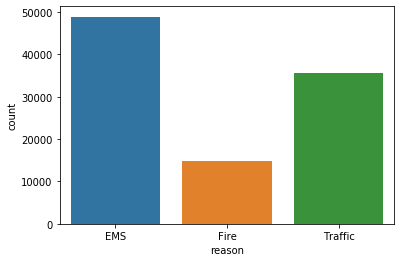

In [44]:
sns.countplot(x='reason', data=df)

In [49]:
##convert timestamp from string to datetype
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.dtypes 

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
reason               object
dtype: object

In [162]:
df['week_day'] = df['timeStamp'].apply(lambda x: x.day_name())
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['hour']=df['timeStamp'].apply(lambda x: x.hour)

In [64]:
df.week_day.value_counts() 

Tuesday      15150
Wednesday    14879
Friday       14833
Monday       14680
Thursday     14478
Saturday     13336
Sunday       12136
Name: week_day, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

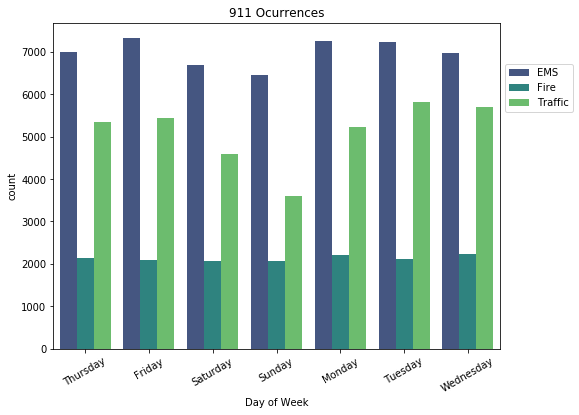

In [153]:
## Plot ocurrences by day

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(ax=ax, x='week_day',hue='reason',data=df,palette='viridis')
plt.legend(loc='center left',bbox_to_anchor=(1,0.8))
ax.set_xlabel('Day of Week')
ax.set_title('911 Ocurrences')
plt.xticks(rotation=30)

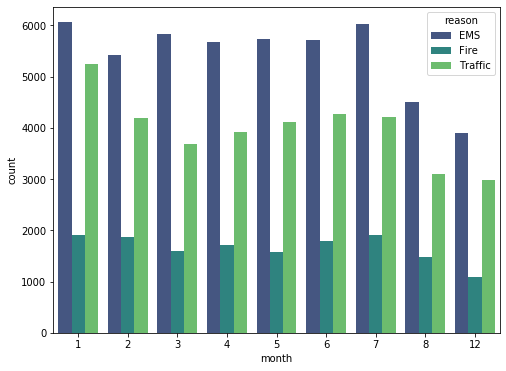

In [131]:
##Plot by month
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(ax=ax, x='month',hue='reason',data=df,palette='viridis')

##Why dont have september,october, november?

In [137]:
## Checking month

byMonth = df.groupby('month').count()
byMonth.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,week_day
month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423


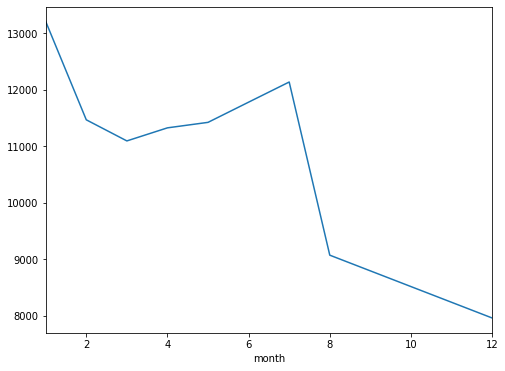

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
byMonth['twp'].plot()

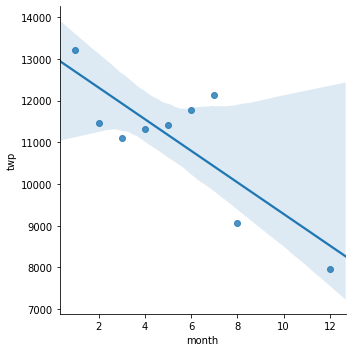

In [138]:
sns.lmplot(x='month', y='twp', data=byMonth.reset_index())
## error increase because don't have sep,oct,nov data

In [142]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,week_day,month,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,12,2015-12-10


Text(0, 0.5, 'count')

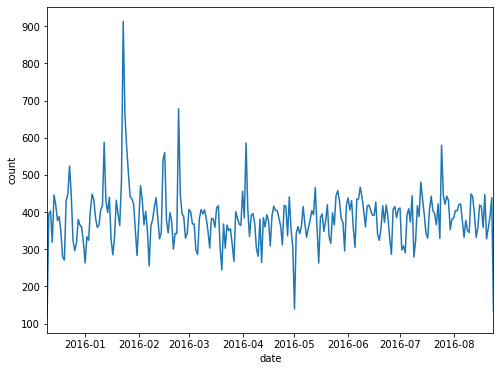

In [151]:
fig, ax=plt.subplots(figsize=(8,6))
ax=df.groupby('date').count()['twp'].plot()
ax.set_ylabel('count')

In [171]:
dayHour = df.groupby(['week_day', 'hour']).count()['twp'].unstack()
dayHour.head()
##groupby day of week and hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
week_day,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Monday,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Saturday,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sunday,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


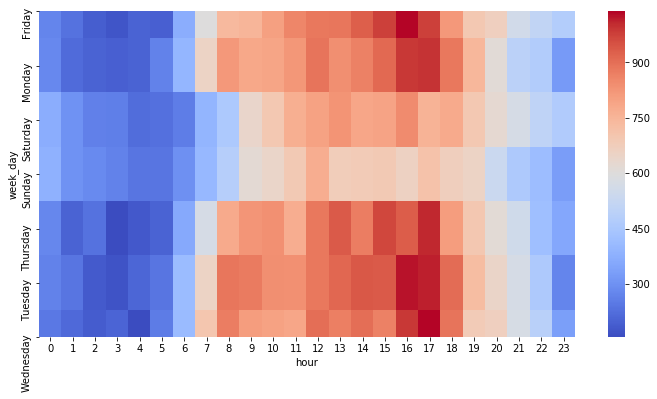

In [175]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='coolwarm')

**Most calls happen between 8 and 18 (comercial time)**

In [176]:
dayMonth = df.groupby(['week_day', 'month']).count()['twp'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
week_day,,,,,,,,,
Friday,1970,1581,1523,1958,1730,1649,2045,1310,1064
Monday,1727,1964,1533,1597,1779,1617,1692,1509,1256
Saturday,2290,1440,1264,1732,1444,1388,1695,1099,978
Sunday,1960,1229,1100,1488,1422,1331,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1227,1265


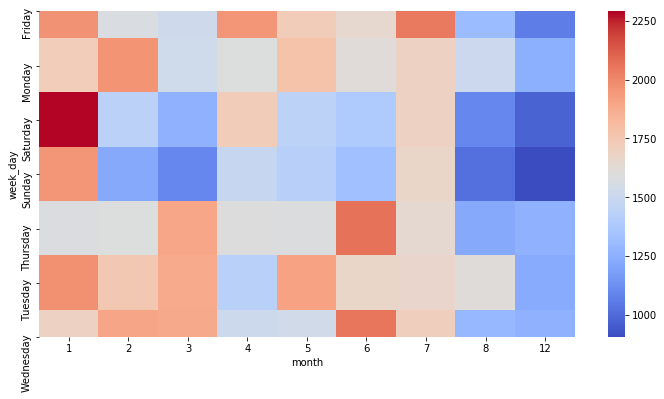

In [177]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='coolwarm')